Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [X] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.
- [x] Do train/validate/test split with the Tanzania Waterpumps data.
- [x] Begin with baselines for classification.
- [x] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [x] Get your validation accuracy score.
- [x] Get and plot your feature importances.
- [x] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [x] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.
- [ ] For your Kaggle Challenge, define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
   - What other columns have zeros and shouldn't? 
   - What other columns are duplicates, or nearly duplicates?
   - Can you extract the year from date_recorded?
   - Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
# Train/val/test split

import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')


train, val = train_test_split(train, train_size=0.8, test_size=0.2,
                              stratify=train['status_group'], random_state=87)

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [3]:
print(train.info())
train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47520 entries, 49337 to 29918
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     47520 non-null  int64  
 1   amount_tsh             47520 non-null  float64
 2   date_recorded          47520 non-null  object 
 3   funder                 44599 non-null  object 
 4   gps_height             47520 non-null  int64  
 5   installer              44583 non-null  object 
 6   longitude              47520 non-null  float64
 7   latitude               47520 non-null  float64
 8   wpt_name               47520 non-null  object 
 9   num_private            47520 non-null  int64  
 10  basin                  47520 non-null  object 
 11  subvillage             47216 non-null  object 
 12  region                 47520 non-null  object 
 13  region_code            47520 non-null  int64  
 14  district_code          47520 non-null  int64  
 15

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
49337,13016,0.0,2011-07-25,Concern,0,TWESA,30.501704,-2.652861e+00,Sabusalo,0,...,soft,good,enough,enough,spring,spring,groundwater,other,other,functional
9165,46235,30.0,2011-03-08,Government Of Tanzania,361,Go,37.928509,-5.990801e+00,Msikiti,0,...,salty,salty,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
23621,52676,0.0,2013-05-03,World Vision,469,World Vision,38.070042,-4.579189e+00,Shuleni,0,...,soft,good,enough,enough,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
50653,49560,0.0,2011-07-27,World Vision,0,DWE,31.851105,-1.186441e+00,Nyabaima,0,...,soft,good,enough,enough,spring,spring,groundwater,improved spring,improved spring,functional
3731,46173,0.0,2013-02-08,Dasp,1237,DASP,34.311775,-1.657887e+00,Ramboni,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16267,17591,6.0,2013-08-03,Ces(gmbh),788,DWE,37.519105,-3.414055e+00,Kwa Janet Hamis,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
57936,72089,0.0,2013-02-09,Amref,128,Amref,39.949469,-1.058854e+01,Kwa Zainabu Katoto,0,...,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
28106,57546,0.0,2013-01-18,Rwssp,0,DWE,0.000000,-2.000000e-08,Muungano,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
1905,73130,0.0,2013-01-20,Government Of Tanzania,1343,DWE,30.296844,-4.464318e+00,Kwa Kora,0,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional needs repair


# Baselines for Classification
We'll start with the majority class baseline

In [4]:
baseline = train['status_group'].value_counts(normalize=True, dropna=False)[0]
print(f'If we guessed the majority class for every prediction,')
print(f'we would correctly identify {round(baseline * 100, 2)}% of functional pumps')

If we guessed the majority class for every prediction,
we would correctly identify 54.31% of functional pumps


# Select Features


In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile

### Clean columns
Code wrangling that is recommended or intuitive but does not improve the model's validation score is commented out.

In [6]:
import numpy as np

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # Drop recorded_by (never varies), id (always varies, random)
    unusable_variance = ['recorded_by', 'id']
    X = X.drop(columns=unusable_variance)
    
#     # About 3% of the time, latitude has small values near zero,
#     # outside Tanzania, so we'll treat these values like zero.
#     X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
# #     # When columns have zeros and shouldn't, they are like null values.
# #     # So we will replace the zeros with nulls, and impute missing values later.
#     cols_with_zeros = ['longitude', 'latitude']
#     for col in cols_with_zeros:
#         X[col] = X[col].replace(0, np.nan)
            
#     quantity & quantity_group are duplicates
#     waterpoint_type_group and water_point are near duplicates
#     X = X.drop(columns=['water_point'])
    X = X.drop(columns=['quantity_group'])

    # Convert date_recorded to datetime, extract year only, drop date_recorded
    # Drop recorded_by (same value for all columns) and num_private (98.7% 0s)
#     X['year_recorded'] = pd.DatetimeIndex(X['date_recorded']).year
#     X = X.drop(columns=['date_recorded'])

    # return the wrangled dataframe
    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [7]:
# import plotly.express as px
# px.scatter(train, x='longitude', y='latitude', color='status_group', opacity=0.1)

### Clean high cardinalities
The cardinality of a collection is the number of unique objects it has. Before we can one-hot encode our categorical features, we must drop high-cardinality columns. Otherwise, the number of columns would explode, our notebook might crash, our model would train very slowly, and the high-cardinality columns it trains on may not even be useful.

In [8]:
# Check cardinality of non-numeric features
train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
permit,45060,2,True,30977
public_meeting,44822,2,True,40771
status_group,47520,3,functional,25807
source_class,47520,3,groundwater,36606
quantity,47520,5,enough,26538
management_group,47520,5,user-group,41961
quality_group,47520,6,good,40646
waterpoint_type_group,47520,6,communal standpipe,27702
source_type,47520,7,spring,13631
payment_type,47520,7,never pay,20155


In [9]:
target = 'status_group'
numerics = train.select_dtypes(include='number').columns.tolist()
categoricals = train.select_dtypes(exclude='number').columns.drop(target).tolist()
low_cardinality_categoricals = [col for col in categoricals
                               if train[col].nunique() <= 50]

features = numerics + low_cardinality_categoricals
features

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'basin',
 'region',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [10]:
profile = ProfileReport(train[features], minimal=True).to_notebook_iframe()

profile

## Scikit-Learn Pipeline

In [11]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]

In [12]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

# Returns sci-kit learn pipeline object with methods like a model (e.g. fit)
# Applies fit transform method to each of these (training set, encoded set, imputed set...)
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    DecisionTreeClassifier(random_state=87)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score on val
print('Training Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

# Predict on test
y_pred = pipeline.predict(X_test)

Training Accuracy: 0.9953703703703703
Validation Accuracy: 0.7554713804713805


In [16]:
DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('koul_1.csv', index=False)

# Plot Feature Importances
While linear models have coefficients, which can be positive or negative, tree models have feature importances, which can't be negative. 
  - This means that linear models return the strength and direction of a feature's effect on the target, but tree models only return the strength of the effect

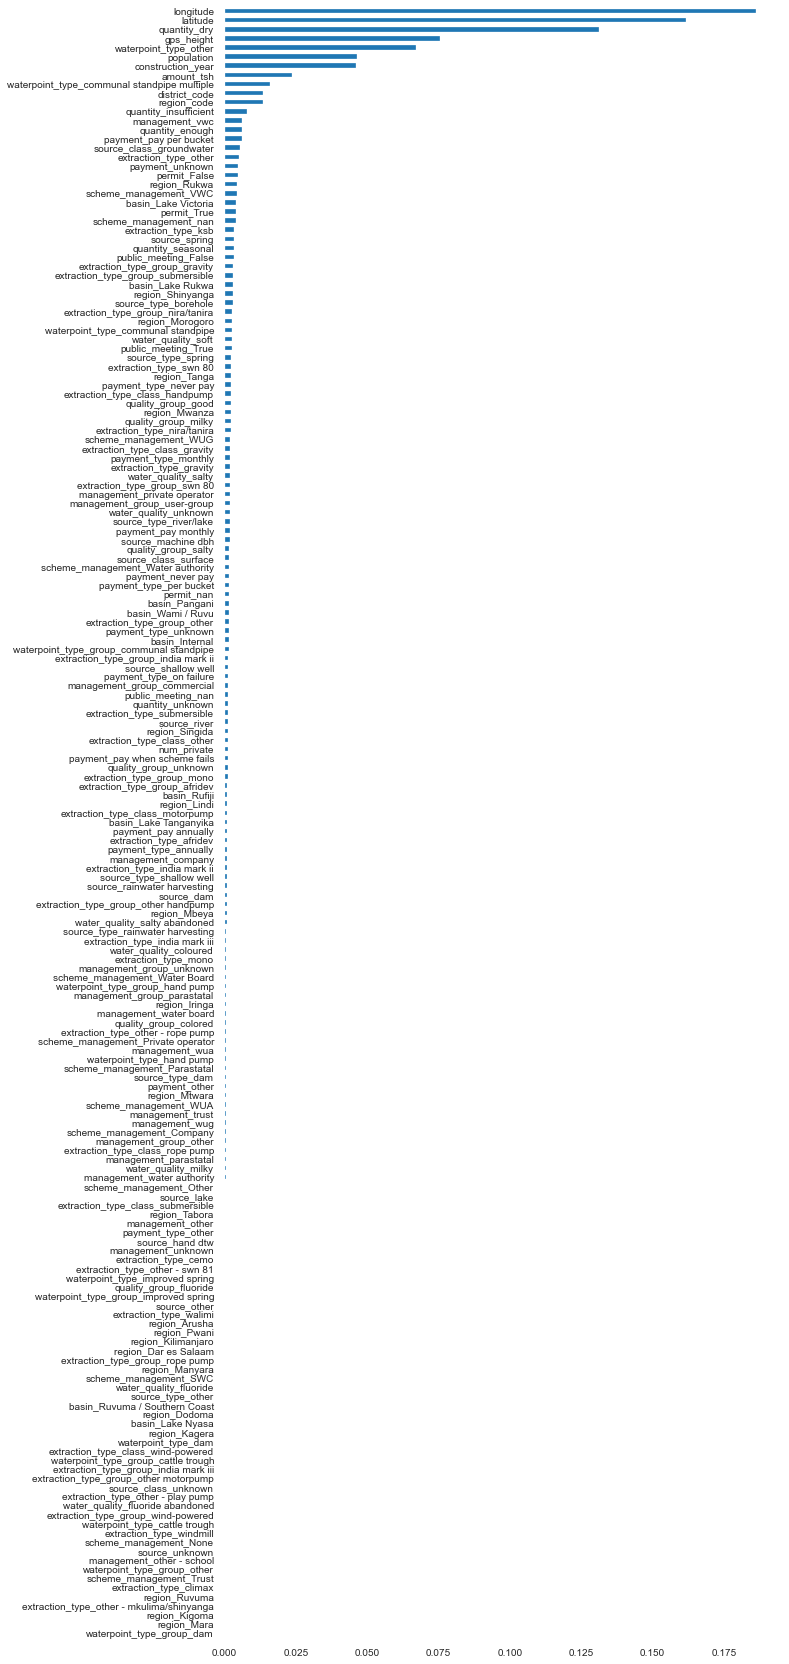

In [14]:
import matplotlib.pyplot as plt
model = pipeline.named_steps['decisiontreeclassifier']

encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns

importances = pd.Series(model.feature_importances_, encoded_columns)

# Increase size so labels don't overlap
plt.figure(figsize=(10, 30))

# Plot
importances.sort_values().plot.barh();